# Lean Six Sigma
## Author: Snigdhayan Mahanta

`Lean Six Sigma` is a well established process improvement methodology. Suppose a company manufactures several products at various locations and it is interested in improving the quality (e.g., reducing the number of defects in the manufactured products). There are several `Lean Six Sigma` tools that it can use to visualize and control the process. I created a curated dataset for this purpose and illustrated some of the tools below.

In [1]:
# Load Libraries
library("qcc")
library("plotrix")

Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



In [2]:
# Create a population of product data
population_size = 10000
n_products = 100
location <- sample(c("Germany", "France", "Spain", "Italy"), population_size, replace = TRUE)
defects <- round(abs(rnorm(population_size, mean = 800, sd = 500)))
quantity <- 1000*defects + round(abs(rnorm(population_size, mean = 50000, sd = 100000)))
code <- round(sample(1:n_products, population_size, replace = TRUE))
code <- paste("Code_", code, sep="")
df <- data.frame("StockCode" = code, "Quantity" = quantity, "Defects" = defects, "Location" = location)

In [3]:
# Generate a sample and visualize it
sample_size <- 100
myData <- df[sample(nrow(df), sample_size), ]
head(myData, 10)

,StockCode,Quantity,Defects,Location
,<fct>,<dbl>,<dbl>,<fct>
7826,Code_26,679454,653,France
7851,Code_58,1275726,1222,Germany
2072,Code_51,578443,472,France
6398,Code_23,804472,721,Italy
3047,Code_94,192131,112,Spain
6152,Code_36,459200,337,Spain
9946,Code_13,692690,622,Italy
5272,Code_38,336366,249,Germany
3160,Code_91,360512,262,Italy


         
Pareto chart analysis for defectCount
             Frequency    Cum.Freq.   Percentage Cum.Percent.
  Code_14  2012.000000  2012.000000    11.680697    11.680697
  Code_65  1905.000000  3917.000000    11.059507    22.740203
  Code_48  1879.000000  5796.000000    10.908563    33.648766
  Code_68  1863.000000  7659.000000    10.815675    44.464441
  Code_36  1841.000000  9500.000000    10.687954    55.152395
  Code_7   1736.000000 11236.000000    10.078374    65.230769
  Code_84  1557.000000 12793.000000     9.039187    74.269956
  Code_7   1503.000000 14296.000000     8.725689    82.995646
  Code_14  1478.000000 15774.000000     8.580552    91.576197
  Code_56  1451.000000 17225.000000     8.423803   100.000000

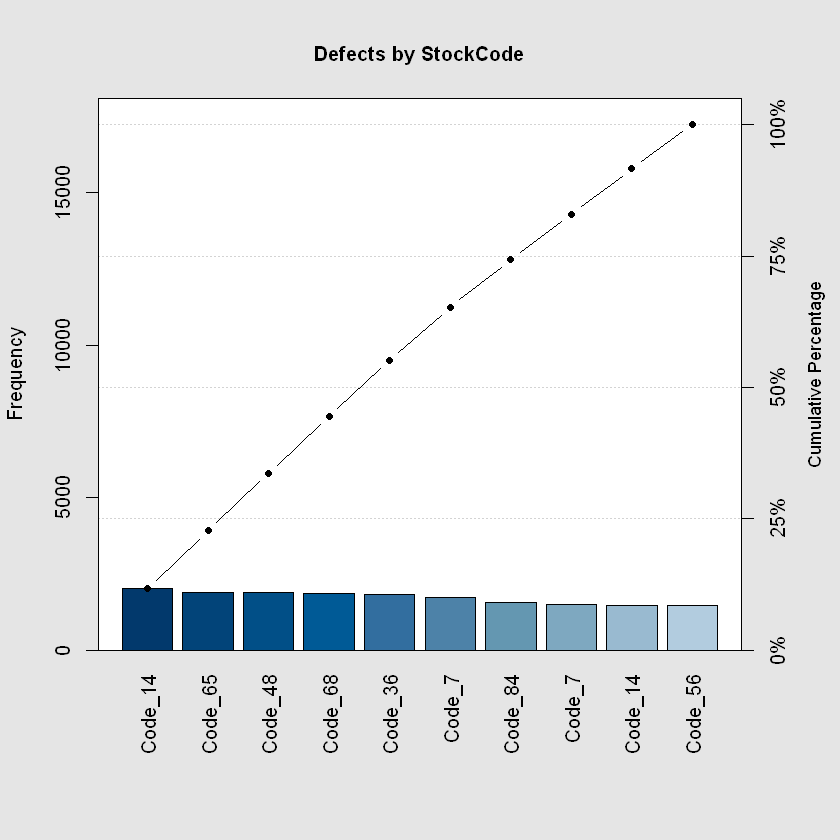

In [4]:
# Pareto chart
orderedData <- myData[order(myData$Defects, decreasing = TRUE), ]
orderedData <- head(orderedData, 10)
defectCount <- orderedData$Defects
names(defectCount) <- orderedData$StockCode
pareto.chart(defectCount, main="Defects by StockCode")

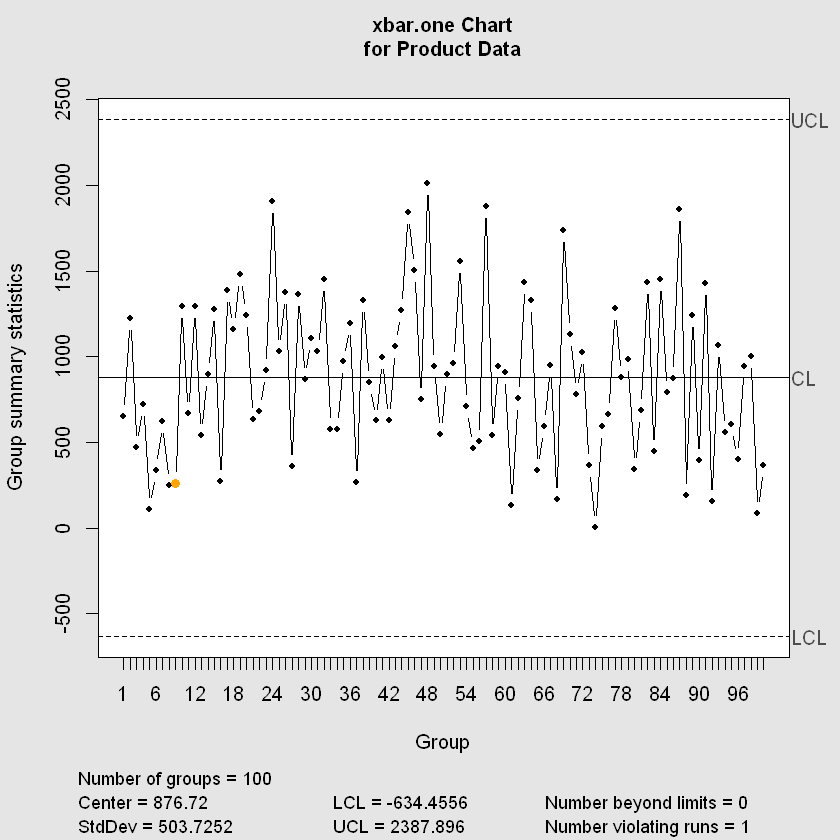

In [5]:
# Create QCC object for dataset and plot control chart 
xbar = qcc(myData$Defects, data.name="Product Data", type="xbar.one", nsigmas=3)


Process Capability Analysis

Call:
process.capability(object = xbar, spec.limits = c(200, 600),     breaks = 20)

Number of obs = 100          Target = 400
       Center = 876.7           LSL = 200
       StdDev = 503.7           USL = 600

Capability indices:

         Value      2.5%    97.5%
Cp     0.13235   0.11393   0.1507
Cp_l   0.44781   0.37201   0.5236
Cp_u  -0.18312  -0.12426  -0.2420
Cp_k  -0.18312  -0.11298  -0.2533
Cpm    0.09612   0.07998   0.1122

Exp<LSL 9%	 Obs<LSL 7%
Exp>USL 71%	 Obs>USL 69%


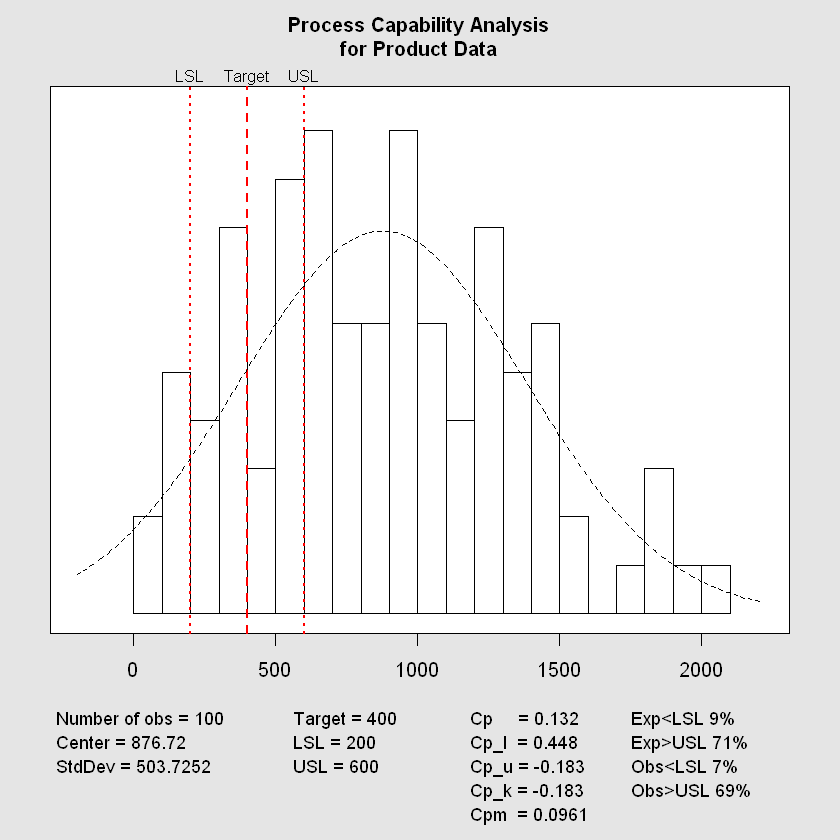

In [6]:
# Capability Analysis
process.capability(xbar, spec.limits=c(200, 600), breaks=20,)

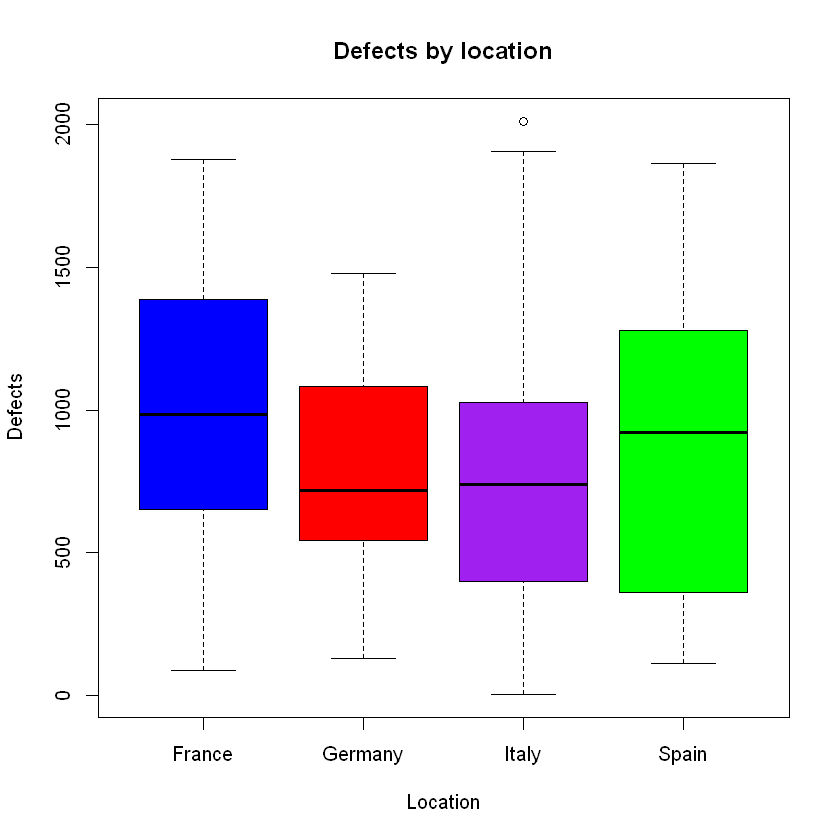

In [7]:
# Boxplot of defects by location
boxplot(data=myData, Defects ~ Location, 
        col = c("blue", "red", "purple", "green"),
        ylab = "Defects",
        main = "Defects by location")

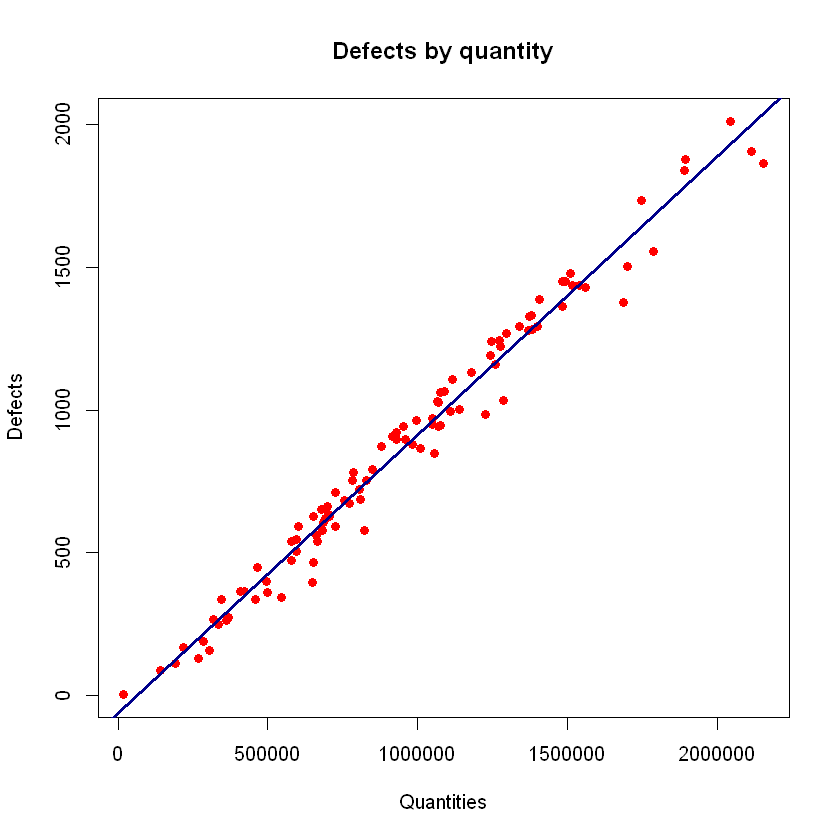

In [8]:
# Scatteroplot of defects by quantity
y = myData$Defects
x = myData$Quantity
plot(x, y,
     type ="p", #point
     col = "red",
     main = "Defects by quantity", 
     xlab = "Quantities",
     ylab = "Defects",
     pch = 16 # Set Visual Appearance of Datapoints
)

# Add best fit line to plot
linear_mod = (lm(y ~ x))
abline(linear_mod, col="darkblue", lwd=3)

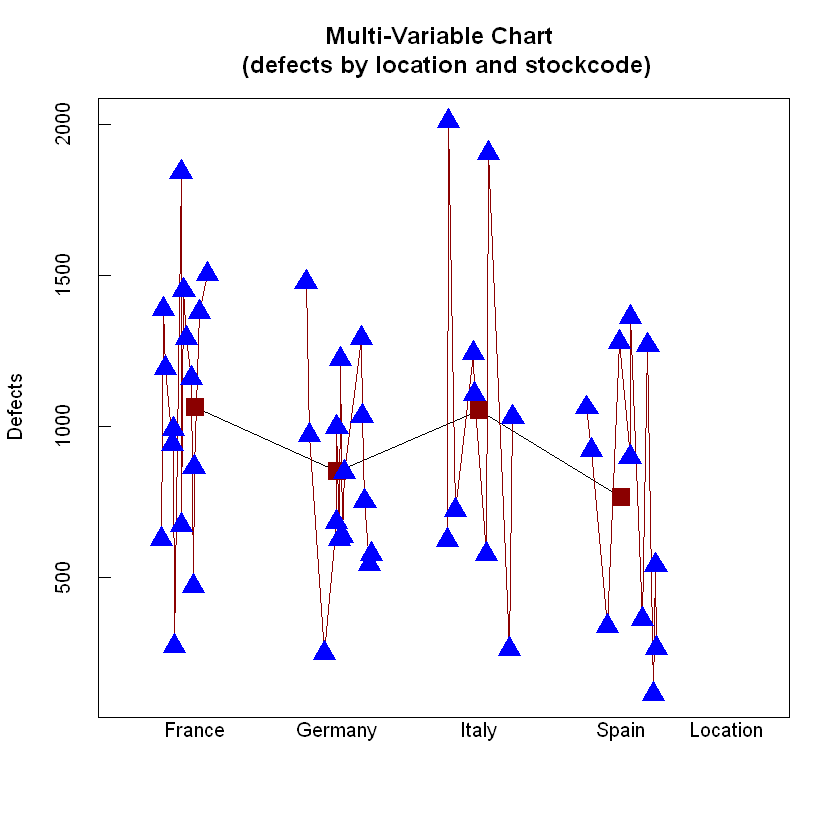

In [9]:
# Multivari chart of defects by location and stockcode
multivari("Defects",                          # Response 
          "Location", "StockCode",             # Factors  
          data = head(myData, 50),            # Data 
          col = list("darkred", "blue"),
          pch = list(15, 17), 
          xlab.depth = 1,
          legend = FALSE,
          main = "Multi-Variable Chart \n (defects by location and stockcode)",
          )

In [10]:
# Analysis of variance (ANOVA)
res.aov <- aov(Defects ~ Location, data = myData)
# Summary of the analysis
summaryAnova <- summary(res.aov)
summaryAnova

            Df   Sum Sq Mean Sq F value Pr(>F)
Location     3  1016899  338966   1.598  0.195
Residuals   96 20368477  212172               

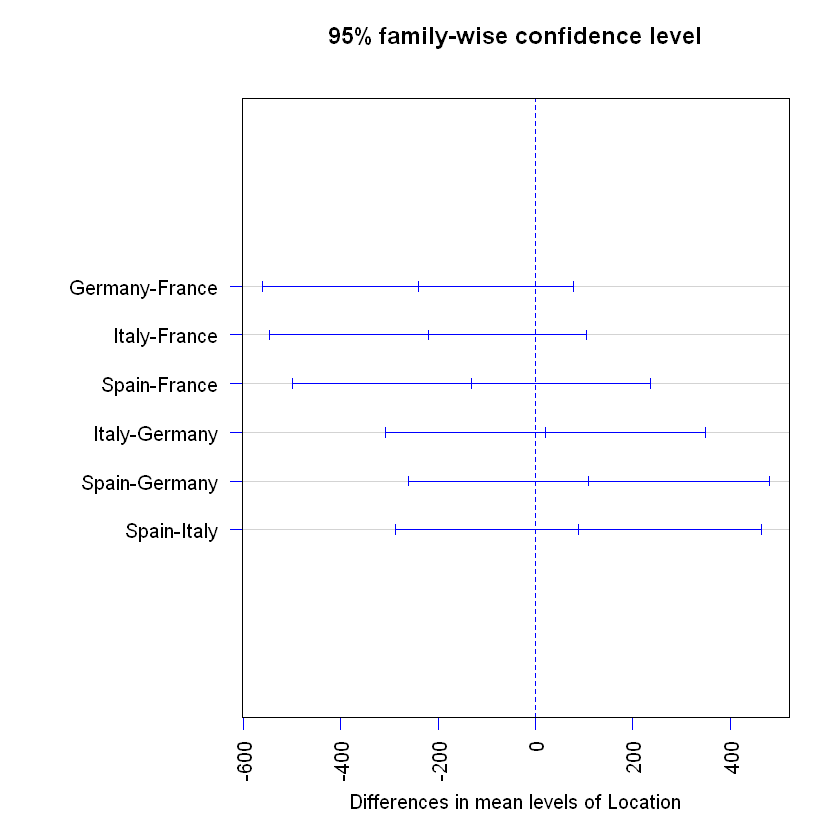

In [11]:
# Tukey test to differentiate the means
TukeyTest <- TukeyHSD(res.aov)
par(mar=c(5.1, 10.1, 4.1, 2.1), mgp=c(3, 1, 0), las=2)
plot(TukeyTest, asp = 100, col = "blue") # ascertain the significance of the differences between the observed means
# TukeyTest